<a href="https://colab.research.google.com/github/dellaanima/NLP_GoingDeeper/blob/main/02/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric

**평가문항**
1. SentencePiece를 이용하여 모델을 만들기까지의 과정이 정상적으로 진행되었는가?
  - 코퍼스 분석, 전처리, SentencePiece 적용, 토크나이저 구현 및 동작이 빠짐없이 진행되었는가?
2. SentencePiece를 통해 만든 Tokenizer가 자연어처리 모델과 결합하여 동작하는가?
  - SentencePiece 토크나이저가 적용된 Text Classifier 모델이 정상적으로 수렴하여 80% 이상의 test accuracy가 확인되었다.
3. SentencePiece의 성능을 다각도로 비교분석하였는가?
  - SentencePiece 토크나이저를 활용했을 때의 성능을 다른 토크나이저 혹은 SentencePiece의 다른 옵션의 경우와 비교하여 분석을 체계적으로 진행하였다.

# korean-english-park.train.ko 데이터로, Sentencepiece tokenizer 모델 생성

## Data Preprocessing

Data Donwload

In [ ]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
!mkdir -p ./sp_tokenizer/data
!mv korean-english-park.train.tar.gz ./sp_tokenizer/data
!cd ./sp_tokenizer/data
!tar -xzvf ./sp_tokenizer/data/korean-english-park.train.tar.gz -C ./sp_tokenizer/data

--2023-08-16 04:51:43--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2023-08-16 04:51:43--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

In [ ]:
path_to_file = './sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file,'r') as f :
    raw = f.read().splitlines()


print('[데이터에 담겨있는 문장 수] : ',len(raw))
print()
print("[데이터 형태 확인]\n")
for sen in raw[0:10]:
    print(sen)

[데이터에 담겨있는 문장 수] :  94123

[데이터 형태 확인]

개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.
그러나 이것은 또한 책상도 필요로 하지 않는다.
79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.
정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.
이 지역에 있는 미국 선박과 상업용 선박들에 대한 알카에다의 (테러) 시도 중 여러 건이 실패했다는 것을 알게 된 후에, 전문가들은 테러 조직이 여전히 세계 경제에 타격을 입히려 한다고 경고하고 있으며, 동남 아시아에 있는 세계 경제의 주요 통로가 위험에 처해 있다고 그들은 생각하고 있다.
국립 과학 학회가 발표한 새 보고서에따르면, 복잡한 임무를 수행해야 하는 군인들이나 보다 오랜 시간 동안 경계를 늦추지 않고 있기 위해 도움이 필요한 군인들에게 카페인이 반응 시간을 증가시키고 임무 수행 능력을 향상시키는데 도움이 된다고 한다.
이 보고서에따르면, "특히, 군사 작전에서 생사가 걸린 상황이 될 수도 있는 반응 속도와 시각 및 청각의 경계 상태를 유지시키기 위해 카페인이 사용될 수도 있다." 고 한다.
"결정적인 순간에 그들의 능력을 증가시켜 줄 그 무엇이 매우 중요합니다."
연구가들이 이미 커피 대체품으로서 음식 대용 과자나 껌에 카페인을 첨가하는 방법을 연구하고 있다고 Archibald는 말했다.


각 문장의 길이 분포 살펴보기

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


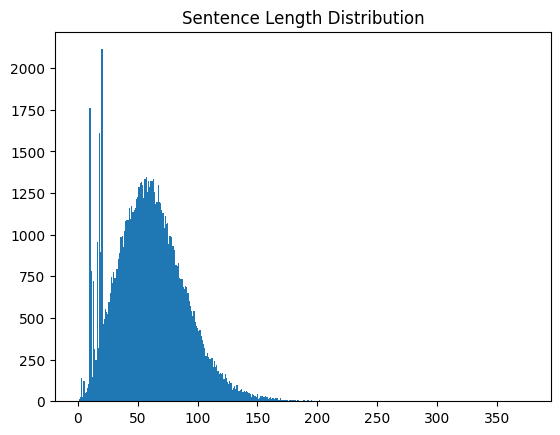

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장 길이 분포를 살펴보며 확인해볼 부분


1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지? : ',' 였다.

2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가? : 중복 데이터가 있음을 확인할 수 있었다.

3) 어디서부터 어디까지 잘라서 쓰지?


In [ ]:
# 1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지?
def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [ ]:
# 2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [ ]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [ ]:
check_sentence_with_length(raw, 21)

미국과 영국의 과학자들이 악수를 했다.
인력은 기계에 의해 보강되어야만 했다.
"시장은 그들에게 넓게 열려 있습니다.
아디다스는 또 다른 이점도 갖고 있다.
공부를 위해서만 이용하겠다고 말입니다.
환경법규의 도입은 고통스러운 과정이다.
- 여보, 이쪽이야, 아니면 저쪽이야?
인도는 훨씬 늦게 게임에 뛰어 들었다.
요즘 대부분의 기업들이 그렇지 않은가?
카리스마적인 지도자들은 위험을 즐긴다.
우리가 하려고 하는 일의 모델은 없다.
정상 회담은 오늘 늦게 끝날 것입니다.
그리고 공화당의 추정은 절반만 맞았다.
하지만 증가하고 있는 노인 인구수에따라
민간부문에서 그런 일을 할 수는 없다고
금년초 이라크 정보부는 "사담 후세인:
실제로 이 방법은 만족스럽지가 못하다.
카자흐스탄으로부터 중국으로 입국하려다가
클립퍼 칩에 대한 이야기로 들어 가자.
북한의 무기 개발에 대한 CIA 보고서
어려움을 겪고 있는 멕시코 경제에 대한
그는 ''미국은 우리의 최악의 적이다.
수로가 오염되고 야생동물이 밀렵되었다.
이런 지역들을 보살피고 보호해야 한다.
학습 방법은 훨씬 더 흠칫한 것입니다.
포옹은 심장에 좋은 약 일 수 도 있다
(경찰은 심문을 위해 그를 구금했다.)
금년에는 이 숫자가 58%로 증가했다.
(금고를 뒤져 많은 서류를 가져갔다.)
김치는 열량은 적고 비타민은 풍부하다.
smear campaign (흑색선전)
아들은 아버지로부터 사업을 이어받는다.
그것은 한계 효과가 나타나는 시기이다.
"사람들에게 선택권이 주어져야 합니다.
로야 저가는 임시 의사 결정 집단이다.
160석이 여성 대표들에게 보장되었다.
걷기 용으로 고안된 신발이 가장 좋다.
이것을 일주일에 5번 정도 해야 한다.
해외 판권은 이미 16개국에서 팔렸다.
그리고 나는 이렇게 엄숙히 서약합니다:
하지만 오늘의 주제를 그는 알것입니다:
(그 사건들은 전쟁 발발로 발전했다.)
"그는 정말로 국민들을 실망시켰습니다.
"제국의 반격"과 새 영화 "스타워즈:
남북간 해상 교전으로 남한 경비정 침몰
공룡들은 필연적으로

중복 제거는 Python의 기본 자료형 set을 활용할 겁니다. set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거해 주거든요! 대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용하셔야 합니다!

중복 제거 후 각 문장의 길이 분포 살펴보기

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


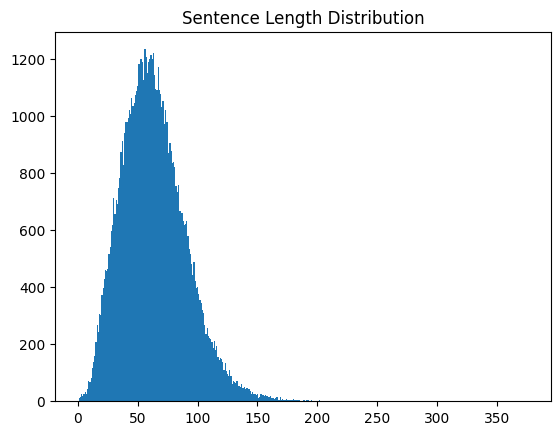

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

데이터에서 적당한 문장 길이 기준을 잡아서 해당 범위의 데이터만 사용해하는 것의 이점 :

- 후에 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적입니다.
- 미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야 합니다.
- 위의 데이터에서 만약 길이가 100인 문장까지만 사용한다면 데이터는 [ (77591 - 길이 100 초과 문장 수) x 100 ] 의 형태를 갖겠지만 모두 사용할 경우 [ 77591 x 377 ] 로 전자보다 최소 3.7배 큰 메모리를 차지합니다. 학습 시간도 그만큼 더 오래 걸리고요.

- 길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법도 있지만 이는 데이터를 섞는 데 편향성이 생길 수 있으므로 지양해야 합니다. 여기서는 길이 150 이상의 데이터를 제거하고 사용하도록 한다.
- 그리고 앞서 확인한 것처럼 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있습니다. 따라서 길이가 10 미만인 데이터도 제거하도록 하죠! 최종 데이터 분포도 함께 확인해봅시다.


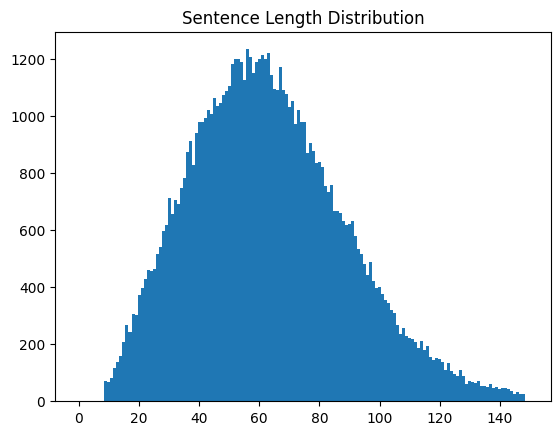

In [ ]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## Sentencepiece Tokenizer 구현

SentencePiece 설치

In [ ]:
!pip install sentencepiece

In [ ]:
# korean-english-park.train.ko.tem
# SentencePiece 모델을 학습하기 위한, 입력 데이터(filtered corpus)를 임시로 저장할 파일로 사용 예정.
temp_file = "/content/sp_tokenizer/data/korean-english-park.train.ko.temp"


In [ ]:
with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 저장해두기
        f.write(str(row) + '\n')

https://github.com/google/sentencepiece#train-sentencepiece-model

 SentencePiece 라이브러리의 spm.SentencePieceTrainer.Train() 함수를 사용하여 모델을 학습하고 어휘 사전을 생성

In [ ]:
# Options 설정
vocab_size = 15000
model_prefix = 'korean_spm'

In [ ]:
import sentencepiece as spm
spm.SentencePieceTrainer.Train(
    '--input={} \
    --model_prefix={} \
    --vocab_size={}'.format(temp_file, model_prefix, vocab_size)
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

생성된 SentencePiece 모델을 사용하는 방법


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',2, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1101, 11, 628, 9, 3206, 11, 303, 36, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [ ]:
with open("./korean_spm.vocab", 'r') as f:
    vocab = f.readlines()

print('[vocab size] : ',len(vocab))
print()
print("[vocab 형태 확인]\n")
print(vocab[0:10])
for v in vocab[0:20]:
    print(v)


[vocab size] :  15000

[vocab 형태 확인]

['<unk>\t0\n', '<s>\t0\n', '</s>\t0\n', '.\t-3.33588\n', '▁\t-3.67633\n', '을\t-3.77317\n', '의\t-3.86014\n', '를\t-4.21518\n', '는\t-4.25507\n', '에\t-4.32531\n']
<unk>	0

<s>	0

</s>	0

.	-3.33588

▁	-3.67633

을	-3.77317

의	-3.86014

를	-4.21518

는	-4.25507

에	-4.32531

이	-4.37277

가	-4.4317

은	-4.50481

,	-4.54621

고	-4.59745

에서	-5.07465

로	-5.1514

▁“	-5.16964

”	-5.2144

한	-5.22031



Tokenizer 함수 작성

In [ ]:
import tensorflow as tf
# s는 SentencePiece 모델 객체, corpus는 텍스트 데이터가 저장된 리스트
def sp_tokenize(s, corpus):

    #토큰화된 데이터의 숫자 시퀀스를 저장할 리스트 tensor
    tensor = []

    # s.EncodeAsIds(sen) :
    # 각 문장을 1. 토큰화 2. 해당 토큰화 결과를 숫자 시퀀스로 변환하여 tensor 리스트에 추가
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    # 생성했던 vocab 을 활용하여,
    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {} # word:idx 담을 dict
    index_word = {} # idx:word 담을 dict

    for idx, line in enumerate(vocab):
        # 위에서 확인했다 시피 "을\t-3.77317\n" 이런식으로 vocab 에 담겨있음. 여기서 word 만 가져와서, index 로 단어사전 생성
        word = line.split("\t")[0]
        word_index.update({word:idx})
        index_word.update({idx:word})

    # tensor 리스트 내의 숫자 시퀀스들을 패딩하여 동일한 길이를 가지는 시퀀스로 만들기
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [ ]:
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)
print(word_index)


[[ 1541  5212     5     4 14973  2458     3     0     0     0     0     0
      0     0]
 [   87  1318    90     4     0   616    11     4    14     0  2653     3
      3     3]]
{'<unk>': 0, '<s>': 1, '</s>': 2, '.': 3, '▁': 4, '을': 5, '의': 6, '를': 7, '는': 8, '에': 9, '이': 10, '가': 11, '은': 12, ',': 13, '고': 14, '에서': 15, '로': 16, '▁“': 17, '”': 18, '한': 19, '인': 20, '일': 21, ')': 22, '(': 23, '▁이': 24, '과': 25, '으로': 26, '▁있다': 27, '와': 28, '▁수': 29, '도': 30, '▁밝혔다': 31, '▁말했다': 32, '할': 33, '지': 34, '년': 35, '다': 36, '▁있는': 37, '며': 38, '하고': 39, '했다': 40, '▁그': 41, '하는': 42, '▁전': 43, '▁그는': 44, '▁2': 45, '▁1': 46, '▁대한': 47, '▁위해': 48, '만': 49, '월': 50, '▁전했다': 51, '▁한': 52, '해': 53, '▁미국': 54, '기': 55, '▁3': 56, '▁이번': 57, '▁지난': 58, '현지시간': 59, '자': 60, '▁중': 61, '스': 62, '된': 63, '▁미': 64, '▁대해': 65, '"': 66, '▁것으로': 67, '▁‘': 68, '에게': 69, '▁것': 70, '▁것이라고': 71, '명이': 72, '▁"': 73, '이라고': 74, '▁있다고': 75, '나': 76, '리': 77, '▁것을': 78, '▁4': 79, 's': 80, '시': 81, '’': 82, '게': 83,

# Naver sentiment movie corpus v1.0 데이터로, Sentencepiece tokenizer 모델 생성

https://github.com/e9t/nsmc/

## Data Preprocessing

In [ ]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt -P /content/nsmc_data
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt -P /content/nsmc_data


--2023-08-16 04:52:36--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘/content/nsmc_data/ratings_train.txt.2’

ratings_train.txt.2 100%[===================>]  13.95M  --.-KB/s    in 0.1s    

2023-08-16 04:52:37 (119 MB/s) - ‘/content/nsmc_data/ratings_train.txt.2’ saved [14628807/14628807]

--2023-08-16 04:52:37--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:

import pandas as pd
train_path = '/content/nsmc_data/ratings_train.txt'
test_path = '/content/nsmc_data/ratings_test.txt'

train_data = pd.read_table(train_path, sep='	',usecols=['id', 'document', 'label'], encoding='UTF-8')
test_data = pd.read_table(test_path, sep='	',usecols=['id', 'document', 'label'], encoding='UTF-8')

In [ ]:
display(train_data.head())
display(test_data.head())

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# 데이터 살펴보기
def data_info(data, title):
    print(f"<{title}>")
    print("*" * 50)
    print("data len:", len(data))
    print("null data:", data.isnull().sum())
    print("duplicates data:", len(data)-len(set(data)))
    print("*" * 50, end="\n\n")


data_info(train_data["document"], "train data")
data_info(test_data["document"], "test data")

<train data>
**************************************************
data len: 150000
null data: 5
duplicates data: 3817
**************************************************

<test data>
**************************************************
data len: 50000
null data: 3
duplicates data: 842
**************************************************



데이터 전처리 수행

In [ ]:
import re
def regex_sentence(corpus):
    sentences = []
    for sentence in corpus:
        sentence = re.sub(r"[^a-zA-Zㅋㅎㅜㅠ가-힣0-9!;?.,]+", r"", sentence)
        sentences.append(sentence)
    corpus = sentences

    return corpus

In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
train_data.dropna(subset=['document'], inplace=True)
train_data['document'] = regex_sentence(train_data['document'])
train_data.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
test_data['document'].replace('', np.nan, inplace=True)
test_data.dropna(subset=['document'], inplace=True)
test_data['document'] = regex_sentence(test_data['document'])
test_data.drop_duplicates(subset=['document'], inplace=True)

Data size: 145319
문장의 최단 길이: 0
문장의 최장 길이: 140
문장의 평균 길이: 28


<ipython-input-26-ac012437b72f>:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


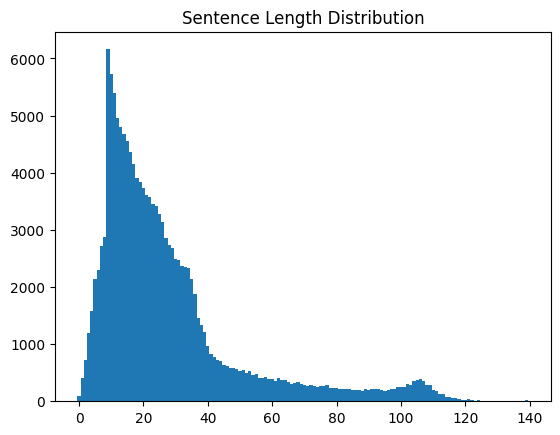

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(train_data['document']))
print("Data size:", len(cleaned_corpus))

for sen in train_data['document']:
    length = len(sen)

    # 문장 최소 길이 찾기
    if min_len > length:
        min_len = length

    # 문장 최대 길이 찾기
    if max_len < length:
        max_len = length

    # 전체 문장을 합쳐서 나온 길이
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data))

# 전체 길이를 0 벡터로 만듦.
# 길이에 따른 문장의 수를 저장하기 위해서 0으로 이루어진 list를 만듦.
sentence_length = np.zeros((max_len), dtype=np.int)

# 0으로 이루어진 벡터에 문장 count를 더한 뒤 넣는다.
for sen in train_data['document']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0) # 너비는 1.0씩 늘어나도록 설정
plt.title("Sentence Length Distribution")
plt.show()

In [ ]:
# 데이터 살펴보기
def data_info(data, title):
    print(f"<{title}>")
    print("*" * 50)
    print("data len:", len(data))
    print("null data:", data.isnull().sum())
    print("duplicates data:", len(data)-len(set(data)))
    print("*" * 50, end="\n\n")


data_info(train_data["document"], "train data")
data_info(test_data["document"], "test data")

<train data>
**************************************************
data len: 145319
null data: 0
duplicates data: 0
**************************************************

<test data>
**************************************************
data len: 48933
null data: 0
duplicates data: 0
**************************************************



Data size: 130372


<ipython-input-28-947c065f31bd>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


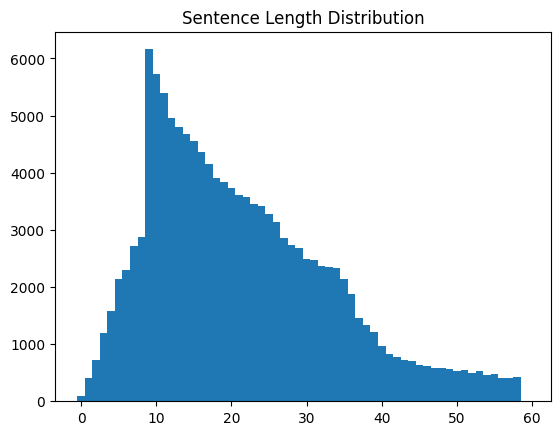

In [ ]:
max_len = 60
min_len = 1

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]
print("Data size:", len(filtered_corpus))

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

길이 분포 확인

max_len = 60 으로줘서, 130372 개만 사용하기로 결정

In [ ]:
train_data = train_data[train_data['document'].apply(lambda x: 10 <= len(x) <= 60)]
test_data = test_data[test_data['document'].apply(lambda x: 10 <= len(x) <= 60)]

In [ ]:
len(train_data)

116734

In [ ]:
len(test_data)

39052

## Sentencepiece Tokenizer 구현

In [ ]:
with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')


### Sentencepiece Tokenizer (unigram)

In [ ]:
 # Options 설정
vocab_size = 25000
model_prefix = 'nsmc_spm_uni'
train_large_corpus = True

import sentencepiece as spm
spm.SentencePieceTrainer.Train(
    '--input={} \
    --model_prefix={} \
    --vocab_size={} \
    --train_extremely_large_corpus={}'.format(temp_file, model_prefix, vocab_size, train_large_corpus)
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('nsmc_spm_uni.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',2, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[3, 6934, 378, 15553, 140, 9, 4]
['▁', '아버지가', '방', '에들어가', '신', '다', '.']
아버지가방에들어가신다.


In [ ]:
with open("/content/nsmc_spm_uni.vocab", 'r') as f:
    vocab = f.readlines()

print('[vocab size] : ',len(vocab))
print()
print("[vocab 형태 확인]\n")
print(vocab[0:10])
for v in vocab[0:10]:
    print(v)


[vocab size] :  25000

[vocab 형태 확인]

['<unk>\t0\n', '<s>\t0\n', '</s>\t0\n', '▁\t-2.8316\n', '.\t-3.12747\n', '..\t-4.03463\n', '...\t-4.27511\n', '이\t-4.64232\n', ',\t-4.783\n', '다\t-4.8616\n']
<unk>	0

<s>	0

</s>	0

▁	-2.8316

.	-3.12747

..	-4.03463

...	-4.27511

이	-4.64232

,	-4.783

다	-4.8616



In [ ]:
def sp_uni_tokenizer(s, train_df, test_df):

    tensor_train = []
    tensor_test = []

    for sen in train_df['document']:
        tensor_train.append(s.EncodeAsIds(sen))

    for sen2 in test_df['document']:
        tensor_test.append(s.EncodeAsIds(sen2))

    with open("/content/nsmc_spm_uni.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    train_label = np.array(train_df['label'])
    test_label = np.array(test_df['label'])
    # Padding 추가
    max_sequence_length = max(max(len(seq) for seq in tensor_train), max(len(seq) for seq in tensor_test))
    tensor_train = tf.keras.preprocessing.sequence.pad_sequences(tensor_train, maxlen=max_sequence_length, padding='post')
    tensor_test = tf.keras.preprocessing.sequence.pad_sequences(tensor_test, maxlen=max_sequence_length, padding='post')

    return tensor_train, train_label, tensor_test, test_label, word_index, index_word

### Sentencepiece Tokenizer (bpe)

In [ ]:
 # Options 설정
vocab_size = 25000
model_prefix = 'nsmc_spm_bpe'
train_large_corpus = True

import sentencepiece as spm
spm.SentencePieceTrainer.Train(
    '--input={} \
    --model_prefix={} \
    --vocab_size={} \
    --model_type=bpe \
    --train_extremely_large_corpus={}'.format(temp_file, model_prefix, vocab_size, train_large_corpus)
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('nsmc_spm_bpe.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',2, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[4707, 641, 23644, 8508, 23374, 15316, 23365]
['▁아버', '지가', '방', '에들어', '가', '신다', '.']
아버지가방에들어가신다.


In [ ]:
with open("/content/nsmc_spm_bpe.vocab", 'r') as f:
    vocab = f.readlines()

print('[vocab size] : ',len(vocab))
print()
print("[vocab 형태 확인]\n")
print(vocab[0:10])
for v in vocab[0:10]:
    print(v)


[vocab size] :  25000

[vocab 형태 확인]

['<unk>\t0\n', '<s>\t0\n', '</s>\t0\n', '..\t-0\n', '영화\t-1\n', '...\t-2\n', 'ᄏᄏ\t-3\n', '!!\t-4\n', '재미\t-5\n', '너무\t-6\n']
<unk>	0

<s>	0

</s>	0

..	-0

영화	-1

...	-2

ᄏᄏ	-3

!!	-4

재미	-5

너무	-6



In [ ]:
def sp_bpe_tokenizer(s, train_df, test_df):

    tensor_train = []
    tensor_test = []

    for sen in train_df['document']:
        tensor_train.append(s.EncodeAsIds(sen))

    for sen2 in test_df['document']:
        tensor_test.append(s.EncodeAsIds(sen2))

    with open("/content/nsmc_spm_bpe.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    train_label = np.array(train_df['label'])
    test_label = np.array(test_df['label'])
    # Padding 추가
    max_sequence_length = max(max(len(seq) for seq in tensor_train), max(len(seq) for seq in tensor_test))
    tensor_train = tf.keras.preprocessing.sequence.pad_sequences(tensor_train, maxlen=max_sequence_length, padding='post')
    tensor_test = tf.keras.preprocessing.sequence.pad_sequences(tensor_test, maxlen=max_sequence_length, padding='post')

    return tensor_train, train_label, tensor_test, test_label, word_index, index_word

# 모델 정의

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model

def LSTM_model(vocab_size, word_vector_dim, units, drop_rate):
    inputs = Input(shape=(None,))  # Input layer

    x = Embedding(vocab_size, word_vector_dim, mask_zero=True)(inputs)
    x = LSTM(units, return_sequences=True, activation='tanh', dropout=drop_rate)(x)
    x = BatchNormalization()(x)
    x = Dropout(drop_rate)(x)
    x = LSTM(units*2, activation='tanh', dropout=drop_rate)(x)
    x = BatchNormalization()(x)
    x = Dropout(drop_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model



# 하이퍼 파라미터
vocab_size = 25000
word_vector_dim = 64
units = 32

drop_rate = 0.5
LSTM_model = LSTM_model(vocab_size, word_vector_dim, units, drop_rate)

LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 64)          1600000   
                                                                 
 lstm (LSTM)                 (None, None, 32)          12416     
                                                                 
 batch_normalization (BatchN  (None, None, 32)         128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                             

# 모델 학습

## unigram 학습

In [ ]:
s_uni = spm.SentencePieceProcessor()
s_uni.Load('/content/nsmc_spm_uni.model')


True

In [ ]:
x_train, y_train, x_test, y_test, uni_word_to_idx, uni_idx_to_word = sp_uni_tokenizer(s_uni, train_data, test_data)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
from tensorflow import keras
epochs=20
batch_size = 256


LSTM_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history_model_u = LSTM_model.fit(x_train, y_train, batch_size=batch_size,\
                    verbose='auto', epochs=epochs,\
                    validation_data=(x_val, y_val), callbacks=[es])

results = LSTM_model.evaluate(x_test,  y_test, verbose=2)
print(results)



Epoch 1/20
365/365 [==============================] - 159s 398ms/step - loss: 0.6067 - accuracy: 0.6860 - val_loss: 0.5277 - val_accuracy: 0.8263
Epoch 2/20
365/365 [==============================] - 111s 305ms/step - loss: 0.3654 - accuracy: 0.8459 - val_loss: 0.3522 - val_accuracy: 0.8499
Epoch 3/20
365/365 [==============================] - 111s 304ms/step - loss: 0.3014 - accuracy: 0.8772 - val_loss: 0.3539 - val_accuracy: 0.8519
Epoch 4/20
365/365 [==============================] - 104s 286ms/step - loss: 0.2669 - accuracy: 0.8935 - val_loss: 0.3815 - val_accuracy: 0.8495
Epoch 5/20
365/365 [==============================] - 108s 296ms/step - loss: 0.2396 - accuracy: 0.9037 - val_loss: 0.3915 - val_accuracy: 0.8483
Epoch 6/20
365/365 [==============================] - 103s 281ms/step - loss: 0.2164 - accuracy: 0.9126 - val_loss: 0.4170 - val_accuracy: 0.8447
Epoch 7/20
365/365 [==============================] - 112s 307ms/step - loss: 0.1948 - accuracy: 0.9208 - val_loss: 0.4668 -

## bpe 학습

In [ ]:
s_bpe = spm.SentencePieceProcessor()
s_bpe.Load('/content/nsmc_spm_bpe.model')


True

In [ ]:
x_train, y_train, x_test, y_test, bpe_word_to_idx, bpe_idx_to_word = sp_bpe_tokenizer(s_bpe, train_data, test_data)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
from tensorflow import keras
epochs=20
batch_size = 256


LSTM_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history_model_b = LSTM_model.fit(x_train, y_train, batch_size=batch_size,\
                    verbose='auto', epochs=epochs,\
                    validation_data=(x_val, y_val), callbacks=[es])

results = LSTM_model.evaluate(x_test,  y_test, verbose=2)
print(results)



Epoch 1/20
365/365 [==============================] - 157s 404ms/step - loss: 0.7022 - accuracy: 0.6085 - val_loss: 0.5040 - val_accuracy: 0.7535
Epoch 2/20
365/365 [==============================] - 112s 307ms/step - loss: 0.4057 - accuracy: 0.8221 - val_loss: 0.3609 - val_accuracy: 0.8419
Epoch 3/20
365/365 [==============================] - 104s 285ms/step - loss: 0.3064 - accuracy: 0.8731 - val_loss: 0.3547 - val_accuracy: 0.8489
Epoch 4/20
365/365 [==============================] - 100s 274ms/step - loss: 0.2652 - accuracy: 0.8924 - val_loss: 0.3710 - val_accuracy: 0.8479
Epoch 5/20
365/365 [==============================] - 106s 291ms/step - loss: 0.2321 - accuracy: 0.9067 - val_loss: 0.3778 - val_accuracy: 0.8474
Epoch 6/20
365/365 [==============================] - 95s 261ms/step - loss: 0.2048 - accuracy: 0.9192 - val_loss: 0.4127 - val_accuracy: 0.8463
Epoch 7/20
365/365 [==============================] - 99s 271ms/step - loss: 0.1842 - accuracy: 0.9274 - val_loss: 0.4408 - v

# Mecab 사용

In [ ]:
!pip install python-mecab-ko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 24.8 MB/s eta 0:00:00


In [ ]:
from mecab import MeCab


In [ ]:
def mecab_token(train_df, test_df, num_words=25000):
    mecab = MeCab()
    temp = []

    concat_df = pd.concat([train_df, test_df], axis=0)
    concat_df.reset_index(inplace=True)

    for i in range(len(concat_df)):
        temp.append(mecab.morphs(concat_df['document'][i]))

    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words, filters=" ", char_level=True)

    tokenizer.fit_on_texts(temp)

    temp_seq = tokenizer.texts_to_sequences(temp)
    max_sequence_length = max(max(len(seq) for seq in temp_seq), max(len(seq) for seq in temp_seq))
    x_train = tf.keras.preprocessing.sequence.pad_sequences(temp_seq, maxlen=max_sequence_length, padding='post')

    x_train, x_test = x_train[:len(train_df)], x_train[len(train_df):]
    y_train, y_test = np.array(concat_df['label'][:len(train_df)]), np.array(concat_df['label'][len(train_df):])


    return x_train, y_train, x_test, y_test, tokenizer


In [ ]:
x_train, y_train, x_test, y_test, mecab_token = mecab_token(train_data, test_data)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
from tensorflow import keras
epochs=20
batch_size = 256


LSTM_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history_model_m = LSTM_model.fit(x_train, y_train, batch_size=batch_size,\
                    verbose='auto', epochs=epochs,\
                    validation_data=(x_val, y_val), callbacks=[es])

results = LSTM_model.evaluate(x_test,  y_test, verbose=2)
print(results)



Epoch 1/20
292/292 [==============================] - 82s 248ms/step - loss: 0.6718 - accuracy: 0.6610 - val_loss: 0.4707 - val_accuracy: 0.7758
Epoch 2/20
292/292 [==============================] - 51s 173ms/step - loss: 0.4206 - accuracy: 0.8105 - val_loss: 0.3819 - val_accuracy: 0.8291
Epoch 3/20
292/292 [==============================] - 48s 161ms/step - loss: 0.3427 - accuracy: 0.8520 - val_loss: 0.3667 - val_accuracy: 0.8376
Epoch 4/20
292/292 [==============================] - 46s 159ms/step - loss: 0.2994 - accuracy: 0.8739 - val_loss: 0.3670 - val_accuracy: 0.8416
Epoch 5/20
292/292 [==============================] - 42s 145ms/step - loss: 0.2699 - accuracy: 0.8885 - val_loss: 0.3668 - val_accuracy: 0.8435
Epoch 6/20
292/292 [==============================] - 44s 150ms/step - loss: 0.2434 - accuracy: 0.9019 - val_loss: 0.3991 - val_accuracy: 0.8407
Epoch 7/20
292/292 [==============================] - 43s 148ms/step - loss: 0.2221 - accuracy: 0.9114 - val_loss: 0.3971 - val_ac

# 결과 비교

In [ ]:
token_list = [history_model_u.history, history_model_b.history, history_model_m.history]
token_names = ['Sentence_piece_unigram','Sentence_piece_bpe','Mecab']
acc_list = ['accuracy', 'val_accuracy']

def acc_df(token_list, token_names, acc_list):
    count = 0
    for token in token_list:
        for num in range(1):
            if num == 1:
                continue
            s1 = round(pd.Series(token[acc_list[num]][-1], index=[token_names[count]]), 3)
            s2 = round(pd.Series(token[acc_list[num+1]][-1], index=[token_names[count]]), 3)
            if token == token_list[0]:
                s = pd.concat([s1, s2], axis=1)
            elif token != token_list[0]:
                other = pd.concat([s1, s2], axis=1)
                s = pd.concat([s, other], axis=0)
            count += 1
    s.rename(columns={0: acc_list[0], 1: acc_list[1]}, inplace=True)

    return s

In [ ]:
result = acc_df(token_list, token_names, acc_list)

result

,accuracy,val_accuracy
Sentence_piece_unigram,0.921,0.841
Sentence_piece_bpe,0.936,0.841
Mecab,0.919,0.842


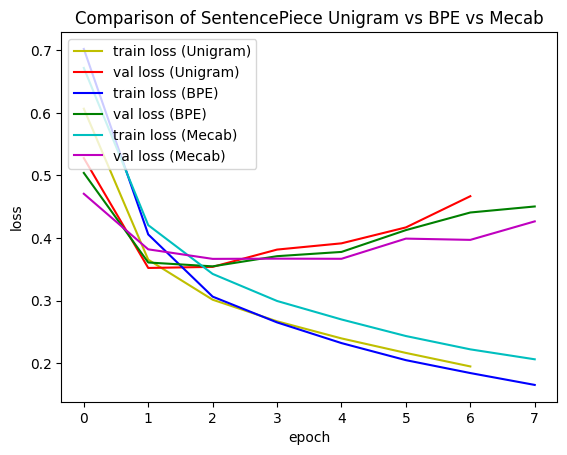

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(history_model_u.history['loss'], 'y', label='train loss (Unigram)')
loss_ax.plot(history_model_u.history['val_loss'], 'r', label='val loss (Unigram)')

loss_ax.plot(history_model_b.history['loss'], 'b', label='train loss (BPE)')
loss_ax.plot(history_model_b.history['val_loss'], 'g', label='val loss (BPE)')

loss_ax.plot(history_model_m.history['loss'], 'c', label='train loss (Mecab)')
loss_ax.plot(history_model_m.history['val_loss'], 'm', label='val loss (Mecab)')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.title('Comparison of SentencePiece Unigram vs BPE vs Mecab')
plt.show()


결과 비교 (Test loss, Test Acc)
- uni [0.4717387557029724, 0.8371146321296692]
- bpe [0.46054840087890625, 0.8338369131088257]
- mecab [0.4268987476825714, 0.8416726589202881]


# SentencePiece + Bert : 미완성

In [ ]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt -P /content/nsmc_data
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt -P /content/nsmc_data


--2023-08-16 07:45:08--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘/content/nsmc_data/ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.04s   

2023-08-16 07:45:10 (326 MB/s) - ‘/content/nsmc_data/ratings_train.txt’ saved [14628807/14628807]

--2023-08-16 07:45:10--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers


In [ ]:

import pandas as pd
train_path = '/content/nsmc_data/ratings_train.txt'
test_path = '/content/nsmc_data/ratings_test.txt'

train_data = pd.read_table(train_path, sep='	',usecols=['id', 'document', 'label'], encoding='UTF-8')
test_data = pd.read_table(test_path, sep='	',usecols=['id', 'document', 'label'], encoding='UTF-8')

In [ ]:
import re
def regex_sentence(corpus):
    sentences = []
    for sentence in corpus:
        sentence = re.sub(r"[^a-zA-Zㅋㅎㅜㅠ가-힣0-9!;?.,]+", r"", sentence)
        sentences.append(sentence)
    corpus = sentences

    return corpus

In [ ]:
import numpy as np
train_data['document'].replace('', np.nan, inplace=True)
train_data.dropna(subset=['document'], inplace=True)
train_data['document'] = regex_sentence(train_data['document'])
train_data.drop_duplicates(subset=['document'], inplace=True)


In [ ]:
test_data['document'].replace('', np.nan, inplace=True)
test_data.dropna(subset=['document'], inplace=True)
test_data['document'] = regex_sentence(test_data['document'])
test_data.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
train_data = train_data[train_data['document'].apply(lambda x: 10 <= len(x) <= 60)]
test_data = test_data[test_data['document'].apply(lambda x: 10 <= len(x) <= 60)]

In [ ]:
cleaned_corpus = list(train_data['document'])

In [ ]:
temp_file = "./nsmc_cleaned.temp"

In [ ]:
with open(temp_file, 'w') as f:
    for row in cleaned_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')


In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00


In [ ]:
import sentencepiece as spm

In [ ]:
corpus = temp_file
prefix = "t5-sp-bpe-nsmc"
vocab_size = 31900-7

spm.SentencePieceTrainer.train(
    f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size + 7}" +
    " --model_type=bpe" +
    " --max_sentence_length=999999" + # 문장 최대 길이 (너무 길면 에러발생)
    " --pad_id=0 --pad_piece=<pad>" + # pad (0)
    " --unk_id=1 --unk_piece=<unk>" + # unknown (1)
    " --bos_id=2 --bos_piece=<s>" + # begin of sequence (2)
    " --eos_id=3 --eos_piece=</s>" + # end of sequence (3)
    " --user_defined_symbols=<sep>,<cls>,<mask>") # 사용자 정의 토큰

학습된 토크나이저 사용하기

    학습된 토크나이저 모델파일을 sentencepiece 라이브러리를 통해 다시 로딩해서 쓸 수 있지만, 사용성을 위해 huggingface의 T5Tokenizer로 랩핑해서 사용하겠습니다

    save_pretrained()함수를 사용하면 최근 많이 사용되는 huggingface의 토크나이저의 포멧으로 저장되어 재사용 할 수 있습니다

    huggingface 클래스를 사용할때 실제 필요한 파일은 t5-sp-bpe-nsmc.model 하나만 있으면 됩니다

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.2 MB/s eta 0:00:00


In [ ]:
from transformers import T5Tokenizer
tokenizer = T5Tokenizer(vocab_file="t5-sp-bpe-nsmc.model")
tokenizer.save_pretrained("t5-tokenizer-bpe-nsmc")
lines = [
  "`DEVOCEAN`은 SK그룹의 대표 개발자 커뮤니티이자🧑",
  "내/외부 개발자 간 소통과 성장을 위한 플랫폼을 상징합니다.👋",
  "`Developers`' Ocean 개발자들을 위한 영감의 바다🙏",
  "`Devotion` 헌신,몰두,전념💯",
  "`Technology for Everyone` 모두를 위한 기술👍"
  ]

for line in lines:
    tokens = tokenizer.tokenize(line)
    inputs = tokenizer(line)
    decoded_sequence = tokenizer.decode(inputs['input_ids'])
    print(line) # 입력 데이터
    print(tokens)  # subword로 토큰화된 데이터
    print(decoded_sequence) # subword토큰화된 데이터 -> token id -> 복원된데이터
    print()

`DEVOCEAN`은 SK그룹의 대표 개발자 커뮤니티이자🧑
['▁', '`', 'D', 'E', 'V', 'O', 'C', 'E', 'A', 'N', '`', '은', '▁S', 'K', '그룹', '의', '▁대', '표', '▁개', '발', '자', '▁커', '뮤', '니', '티', '이자', '🧑']
<unk> DEVOCEAN<unk> 은 SK그룹의 대표 개발자 커뮤니티이자<unk></s>

내/외부 개발자 간 소통과 성장을 위한 플랫폼을 상징합니다.👋
['▁내', '/', '외', '부', '▁개', '발', '자', '▁간', '▁소', '통과', '▁성', '장을', '▁', '위한', '▁', '플', '랫', '폼', '을', '▁상', '징', '합니다', '.', '👋']
내<unk> 외부 개발자 간 소통과 성장을 위한 플랫폼을 상징합니다.<unk></s>

`Developers`' Ocean 개발자들을 위한 영감의 바다🙏
['▁', '`', 'D', 'ev', 'el', 'op', 'ers', "`'", '▁O', 'ce', 'an', '▁개', '발', '자', '들을', '▁', '위한', '▁영', '감', '의', '▁바다', '🙏']
<unk> Developers<unk> Ocean 개발자들을 위한 영감의 바다<unk></s>

`Devotion` 헌신,몰두,전념💯
['▁', '`', 'D', 'ev', 'ot', 'ion', '`', '▁', '헌신', ',', '몰두', ',', '전', '념', '💯']
<unk> Devotion<unk> 헌신,몰두,전념<unk></s>

`Technology for Everyone` 모두를 위한 기술👍
['▁', '`', 'T', 'e', 'ch', 'n', 'ol', 'og', 'y', '▁', 'for', '▁E', 'very', 'one', '`', '▁모두', '를', '▁', '위한', '▁기술', '👍']
<unk> Technology for Everyone<unk> 모두를 

In [ ]:
import sentencepiece as spm
from pathlib import Path

prefix = "t5-sp-bpe-nsmc-byte-fallback"
vocab_size = 31900-7
spm.SentencePieceTrainer.train(
    f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size + 7}" +
    " --model_type=bpe" +
    " --max_sentence_length=999999" + # 문장 최대 길이 -> 이게 너무 길면 에러발생함
    " --pad_id=0 --pad_piece=<pad>" + # pad (0)
    " --unk_id=1 --unk_piece=<unk>" + # unknown (1)
    " --bos_id=2 --bos_piece=<s>" + # begin of sequence (2)
    " --eos_id=3 --eos_piece=</s>" + # end of sequence (3)
    " --byte_fallback=true" + # add byte_fallback for unk tokens
    " --user_defined_symbols=<sep>,<cls>,<mask>") # 사용자 정의 토큰

In [ ]:
from transformers import T5Tokenizer
tokenizer = T5Tokenizer(vocab_file="t5-sp-bpe-nsmc-byte-fallback.model")
tokenizer.save_pretrained("t5-tokenizer-bpe-nsmc-byte-fallback")
lines = [
  "`DEVOCEAN`은 SK그룹의 대표 개발자 커뮤니티이자🧑",
  "내/외부 개발자 간 소통과 성장을 위한 플랫폼을 상징합니다.👋",
  "`Developers`' Ocean 개발자들을 위한 영감의 바다🙏",
  "`Devotion` 헌신,몰두,전념💯",
  "`Technology for Everyone` 모두를 위한 기술👍"
  ]

for line in lines:
    tokens = tokenizer.tokenize(line)
    inputs = tokenizer(line)
    decoded_sequence = tokenizer.decode(inputs['input_ids'])
    print(line)
    print(tokens)
    print(decoded_sequence)
    print()

`DEVOCEAN`은 SK그룹의 대표 개발자 커뮤니티이자🧑
['▁', '<0x60>', 'D', 'E', 'V', 'O', 'C', 'E', 'A', 'N', '<0x60>', '은', '▁S', 'K', '그룹', '의', '▁대', '표', '▁개', '발', '자', '▁커', '뮤', '니', '티', '이자', '<0xF0>', '<0x9F>', '<0xA7>', '<0x91>']
`DEVOCEAN`은 SK그룹의 대표 개발자 커뮤니티이자🧑</s>

내/외부 개발자 간 소통과 성장을 위한 플랫폼을 상징합니다.👋
['▁내', '<0x2F>', '외', '부', '▁개', '발', '자', '▁간', '▁소', '통과', '▁성', '장을', '▁', '위한', '▁', '플', '랫', '폼', '을', '▁상', '징', '합니다', '.', '<0xF0>', '<0x9F>', '<0x91>', '<0x8B>']
내/외부 개발자 간 소통과 성장을 위한 플랫폼을 상징합니다.👋</s>

`Developers`' Ocean 개발자들을 위한 영감의 바다🙏
['▁', '<0x60>', 'D', 'ev', 'el', 'op', 'ers', '<0x60>', '<0x27>', '▁O', 'ce', 'an', '▁개', '발', '자', '들을', '▁', '위한', '▁영', '감', '의', '▁바다', '<0xF0>', '<0x9F>', '<0x99>', '<0x8F>']
`Developers`' Ocean 개발자들을 위한 영감의 바다🙏</s>

`Devotion` 헌신,몰두,전념💯
['▁', '<0x60>', 'D', 'ev', 'ot', 'ion', '<0x60>', '▁', '헌신', ',', '몰두', ',', '전', '념', '<0xF0>', '<0x9F>', '<0x92>', '<0xAF>']
`Devotion` 헌신,몰두,전념💯</s>

`Technology for Everyone` 모두를 위한 기술👍
['▁', '<0x60>', 'T', 'e',

In [ ]:
import tensorflow as tf
def sp_bpe_tokenizer_t5(s, train_df, test_df):

    tensor_train = []
    tensor_test = []

    for sen in train_df['document']:
        tensor_train.append(s.EncodeAsIds(sen))

    for sen2 in test_df['document']:
        tensor_test.append(s.EncodeAsIds(sen2))

    with open("/content/t5-sp-bpe-nsmc-byte-fallback.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    train_label = np.array(train_df['label'])
    test_label = np.array(test_df['label'])
    # Padding 추가
    max_sequence_length = max(max(len(seq) for seq in tensor_train), max(len(seq) for seq in tensor_test))
    tensor_train = tf.keras.preprocessing.sequence.pad_sequences(tensor_train, maxlen=max_sequence_length, padding='post')
    tensor_test = tf.keras.preprocessing.sequence.pad_sequences(tensor_test, maxlen=max_sequence_length, padding='post')

    return tensor_train, train_label, tensor_test, test_label, word_index, index_word